<a href="https://colab.research.google.com/github/asheta66/CNN-WorkOut/blob/main/Classification_Uaing_ML_Alaa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Classification Using Machine Learning (Alaa1)
<br>
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use logistic regression (classification) algorithm.

In [203]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# Dataset is now stored in a Pandas Dataframe
#print(os.listdir("https://github.com/asheta66/CNN-WorkOut/blob/0085735f6794dbef57badc24dc60d16a20c31f72/Test1.csv"))

# Any results you write to the current directory are saved as output.

## Read Data

In [205]:
# We are reading our data
url = "https://raw.githubusercontent.com/asheta66/CNN-WorkOut/main/copd2.csv"
df  =  pd.read_csv(url)

HTTPError: ignored

In [201]:
# First 5 rows of our data
df.head()

,height,weight,age,sex,race,fv1/fvc,fev1/fev6,smoker,cough,dapnea,target
0,66.50,165.0,66,0,0,48,102,1,1,1,1.0
1,68.75,204.0,66,0,0,52,79,1,0,0,1.0
2,68.00,197.0,59,0,1,80,69,0,1,1,1.0
3,62.00,141.0,79,1,0,69,99,1,0,1,1.0
4,61.50,159.0,80,1,0,70,102,1,1,0,1.0


Data contains; <br>

*   height	<br>
*   weight	<br>
*   age - age in years	<br> 
*   sex - (1 = male; 2 = female)<br> 	
*   ace<br>	
*   x1<br>	
*   x2 <br>	
*   fev1_pre<br>	
*   fev1_post	<br>
*   fev1_fvc_pre<br>
*  target - have disease or not (Y=yes, N=no)

## Data Exploration

In [ ]:
df.target.value_counts()

N    1033
Y     598
Name: target, dtype: int64

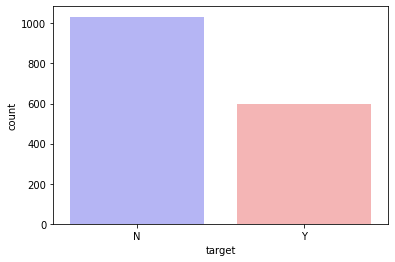

In [ ]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [202]:
countNoDisease = len(df[df.target == 1])
countHaveDisease = len(df[df.target == 0])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 37.57%
Percentage of Patients Have Heart Disease: 61.26%


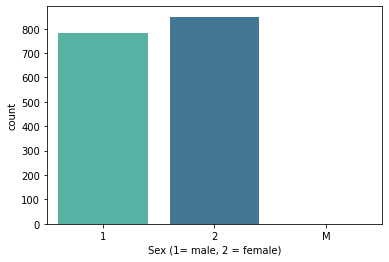

In [ ]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (1= male, 2 = female)")
plt.show()

In [ ]:
countFemale = len(df[df.sex == '2'])
countMale = len(df[df.sex == '1'])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 52.05%
Percentage of Male Patients: 47.88%


In [ ]:
df.groupby('target').mean()

,height,weight,age,race,x1,x2,fev1_pre,fev1_post,fev1_fvc_pre,fev1_fvc_post,tlc,dlcounc,fev1_fv6_pre,fev1_fv6_post
target,,,,,,,,,,,,,,
N,64.574153,196.646805,64.800581,1.488867,79.229429,79.982875,78.164569,80.080542,77.021297,78.509197,86.034850,77.735721,97.132623,98.816070
Y,64.635033,189.163880,70.277592,1.336120,76.515050,78.959866,64.638796,67.770903,65.113712,65.986622,91.215719,65.170569,85.411371,86.476589


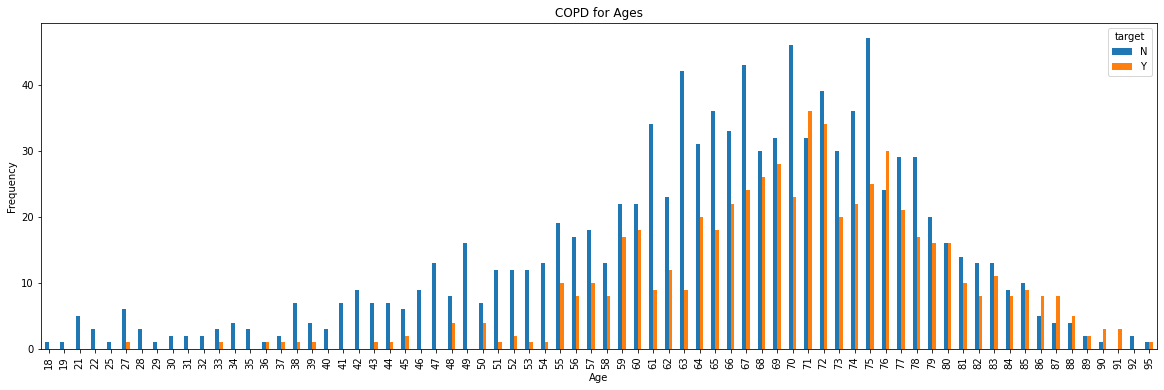

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('COPD for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('COPDforAges.png')
plt.show()

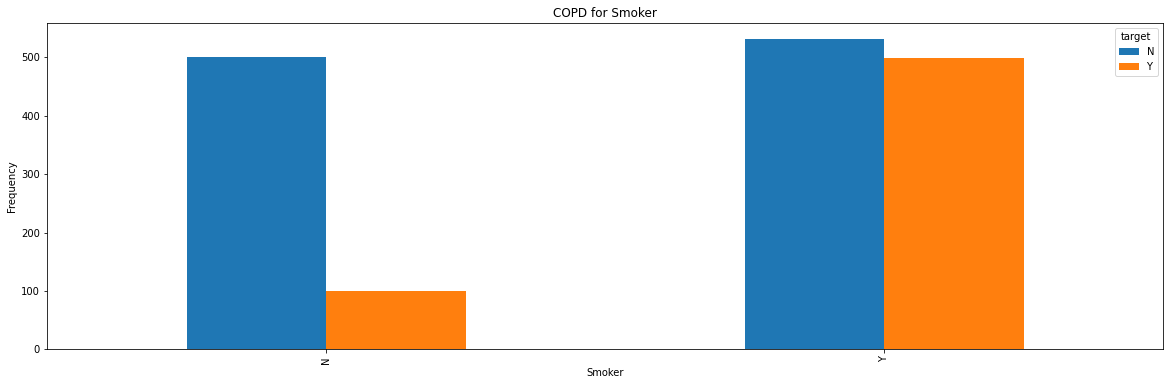

In [ ]:
pd.crosstab(df.smoker,df.target).plot(kind="bar",figsize=(20,6))
plt.title('COPD for Smoker')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.savefig('COPDforSmoker.png')
plt.show()

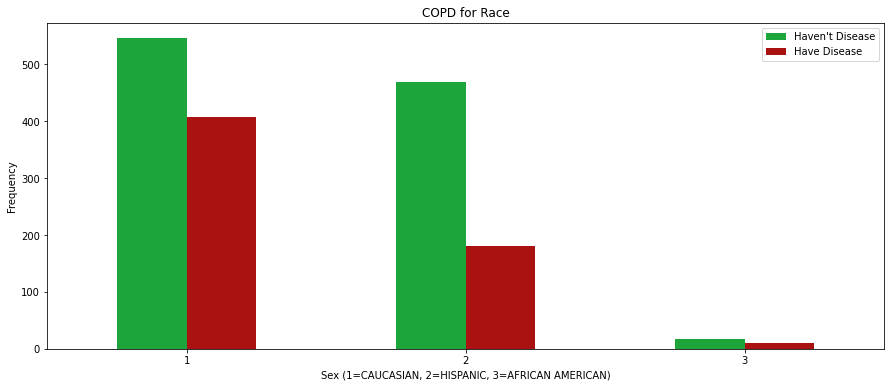

In [ ]:
pd.crosstab(df.race,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('COPD for Race')
plt.xlabel('Sex (1=CAUCASIAN, 2=HISPANIC, 3=AFRICAN AMERICAN)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

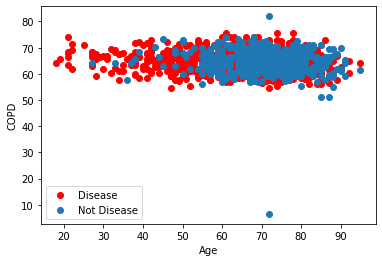

In [ ]:
plt.scatter(x=df.age[df.target=='N'], y=df.height[(df.target=='N')], c="red")
plt.scatter(x=df.age[df.target=='Y'], y=df.height[(df.target=='Y')])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("COPD")
plt.show()

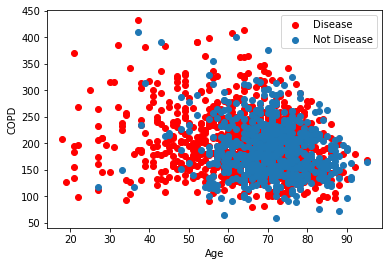

In [ ]:
plt.scatter(x=df.age[df.target=='N'], y=df.weight[(df.target=='N')], c="red")
plt.scatter(x=df.age[df.target=='Y'], y=df.weight[(df.target=='Y')])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("COPD")
plt.show()

### Creating Dummy Variables

![](http://)Since 'smoker',	'cough' and 'dYspNea' are categorical variables we'll turn them into dummy variables.

In [ ]:
b = pd.get_dummies(df['cough'], prefix = "cough")
c = pd.get_dummies(df['dYspNea'], prefix = "dYspNea")

In [ ]:
frames = [df, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,height,weight,age,sex,race,x1,x2,fev1_pre,fev1_post,fev1_fvc_pre,fev1_fvc_post,tlc,dlcounc,fev1_fv6_pre,fev1_fv6_post,smoker,cough,dYspNea,target,smoker_N,smoker_Y,cough_N,cough_N,cough_Y,dYspNea_N,dYspNea_Y,cough_N,cough_N,cough_Y,dYspNea_N,dYspNea_Y
0,71.50,192.0,66,1,1,55,56.0,56,57.0,77,77,51,52,99,9,Y,N,Y,N,0,1,1,0,0,0,1,1,0,0,0,1
1,59.00,136.5,71,2,1,53,56.0,18,20.0,27,29,121,32,40,43,Y,N,Y,Y,0,1,1,0,0,0,1,1,0,0,0,1
2,66.00,140.0,72,1,1,57,75.0,19,21.0,26,21,115,37,44,45,Y,Y,Y,Y,0,1,0,0,1,0,1,0,0,1,0,1
3,60.25,174.0,63,2,1,58,58.0,20,21.0,28,29,114,31,47,45,Y,N,Y,Y,0,1,1,0,0,0,1,1,0,0,0,1
4,66.00,170.0,57,1,1,40,46.0,15,17.0,29,29,104,29,42,45,Y,N,Y,Y,0,1,1,0,0,0,1,1,0,0,0,1


In [ ]:
df = df.drop(columns = ['cough', 'dYspNea'])
df.head()

,height,weight,age,sex,race,x1,x2,fev1_pre,fev1_post,fev1_fvc_pre,fev1_fvc_post,tlc,dlcounc,fev1_fv6_pre,fev1_fv6_post,smoker,target,smoker_N,smoker_Y,cough_N,cough_N,cough_Y,dYspNea_N,dYspNea_Y,cough_N,cough_N,cough_Y,dYspNea_N,dYspNea_Y
0,71.50,192.0,66,1,1,55,56.0,56,57.0,77,77,51,52,99,9,Y,N,0,1,1,0,0,0,1,1,0,0,0,1
1,59.00,136.5,71,2,1,53,56.0,18,20.0,27,29,121,32,40,43,Y,Y,0,1,1,0,0,0,1,1,0,0,0,1
2,66.00,140.0,72,1,1,57,75.0,19,21.0,26,21,115,37,44,45,Y,Y,0,1,0,0,1,0,1,0,0,1,0,1
3,60.25,174.0,63,2,1,58,58.0,20,21.0,28,29,114,31,47,45,Y,Y,0,1,1,0,0,0,1,1,0,0,0,1
4,66.00,170.0,57,1,1,40,46.0,15,17.0,29,29,104,29,42,45,Y,Y,0,1,1,0,0,0,1,1,0,0,0,1


## Creating Model for Logistic Regression
<br>
We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.

In [ ]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

### Normalize Data
<br>
<br>
<img src="https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png?w=863" width="400px"/>

In [ ]:
# Normalize
#x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x = x_data

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [ ]:
x_train.head()

,1086,619,1630,563,570,898,2,479,907,1552,211,644,641,1528,524,1522,1177,427,817,96,178,108,1210,553,1244,722,620,1,840,512,1353,513,48,986,1295,1197,1501,1058,726,1597,...,1289,1312,423,910,1171,659,797,1604,1201,99,850,448,1455,755,976,115,777,72,845,537,849,174,87,551,1510,705,314,1420,600,1496,1094,599,277,1033,1383,763,835,1216,559,684
height,59.25,63.5,63.5,65,63.5,61.75,66,61.5,66.5,60.5,63.25,59,63,57.25,66,58.25,66,64,68.25,62,63,61.25,63,67.5,62,67,63.5,59,62.75,62.75,69,63.5,74,66,64.5,70.25,59.25,71,66,67,...,62.75,65.5,64.25,69,63.75,68.5,67.75,63.5,61.25,62.75,59.5,60,69.75,63.25,65.25,60,67.25,59.75,60.5,63.75,66.25,64,62,64,67,62.5,60,65.25,64.75,67.25,57.25,69.75,71.25,64.25,64.75,60.5,56.5,62,71,67.5
weight,169,154.5,144.5,217,182,175,140,187,157,212,190,161,242,176,261,144,200,137.5,314,162.5,219.5,99.5,92,219,181,192,191,136.5,149,133,250.5,273,241,180,322,391,327,271,167,258.5,...,157,307,129,233,198.5,194,229.8,159,153,137,337,138,241,153,337,100.5,180,140.5,135,163.5,136,122,113,134,222,157,178,183.5,252,210,231.5,179,195,236,260,201.5,99.5,231,210,204
age,50,73,86,80,66,72,72,70,39,75,63,68,68,49,68,72,54,59,39,83,45,77,83,60,56,61,70,71,65,90,63,68,66,64,47,43,47,56,58,79,...,46,65,69,33,70,73,76,83,66,56,56,82,64,78,43,55,64,78,51,79,45,86,78,67,68,78,71,67,70,67,73,55,59,69,64,59,84,78,78,80
sex,2,2,2,1,2,2,1,2,2,2,2,2,1,2,1,2,1,2,2,2,2,2,2,1,2,1,1,2,2,2,1,2,1,1,2,1,2,1,2,1,...,2,1,2,1,1,1,1,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2,2,1,1,2,1,1,2,2,1,1,1,2,2,2,2,1,2
race,2,1,1,2,1,2,1,1,1,1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,2,2,2,1,1,1,2,1,1,2,2,1,1,1,1,1,...,2,2,1,2,1,2,1,1,2,1,1,1,2,1,2,1,1,1,2,1,2,1,1,2,2,2,1,2,2,1,1,1,1,2,1,1,2,2,1,1


Let's say weight = 0.01 and bias = 0.0

In [ ]:
#initialize
def initialize(dimension):    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

### Sigmoid Function
<br>
<img src="https://qph.fs.quoracdn.net/main-qimg-05edc1873d0103e36064862a45566dba" width="500px"/>

In [ ]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

### Forward and Backward Propagation
<br>
<img src="https://image.slidesharecdn.com/gradientdescentbackpropandautomaticdifferentiation-160829164205/95/gradient-descent-back-propagation-and-auto-differentiation-advanced-spark-and-tensorflow-meetup-08042016-62-638.jpg?cb=1472489358" width="500px"/>

### Cost Function
<br>
<img src="https://i.stack.imgur.com/XbU4S.png" width="500px"/>

### Gradient Descent
<br>
<img src="https://i.stack.imgur.com/pYVzl.png" width="500px"/>

By the way in formulas; <br>
* h0(x^i)= y_head
* y^i = y_train
* x^i = x_train

In [ ]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [ ]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [ ]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [ ]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

In [ ]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

TypeError: ignored

## <font color="blue">Manuel Test Accuracy is <font color="red">**86.89%**</font></font><br>
Let's find out sklearn's score.

### Sklearn Logistic Regression

In [ ]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

ValueError: ignored

1. ## <font color = "purple">Our model works with <font color="red">**86.89%**</font> accuracy.</font>

## K-Nearest Neighbour (KNN) Classification
<br>
Let's see what will be score if we use KNN algorithm.

**KNN Algorithm**
<br>
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png"/>

In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

ValueError: ignored

In [ ]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

ValueError: ignored

As you can see above if we define k as 3-7-8 we will reach maximum score. <br>
## <font color="green">KNN Model's Accuracy is <font color="red">88.52%</font></font>

## Support Vector Machine (SVM) Algorithm 
Now we will use SVM algorithm. 

**Support Vector Machine Algorithm**
<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg" width="500px"/><br>
<img src="https://aitrends.com/wp-content/uploads/2018/01/1-19SVM-2.jpg" width="500px"/>


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 88.52%


## <font color="orange">Test Accuracy of SVM Algorithm is <font color="red"> 86.89%</font></font>

## Naive Bayes Algorithm

**Naive Bayes Algorithm**
<br>
<img src="https://s3.ap-south-1.amazonaws.com/techleer/204.png" width="500px"/>

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.89%


## <font color="magenta">Accuracy of Naive Bayes: <font color="red">86.89%</font></font>

## Decision Tree Algorithm

**Decision Tree Algorithm**
<br>
![image.png](attachment:image.png)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 80.33%


## <font color="#CFC60E">Test Accuracy of Decision Tree Algorithm: <font color="red">78.69%</font></font>

## Random Forest Classification

In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 88.52%


## <font color="#0FBBAE">Test Accuracy of Random Forest: <font color="red">88.52%</font></font>

## Comparing Models

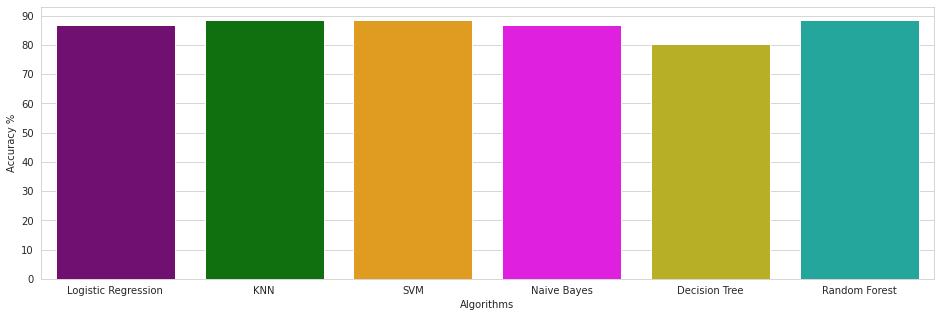

In [ ]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

Our models work fine but best of them are KNN and Random Forest with 88.52% of accuracy. Let's look their confusion matrixes.

## Confusion Matrix

In [ ]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)


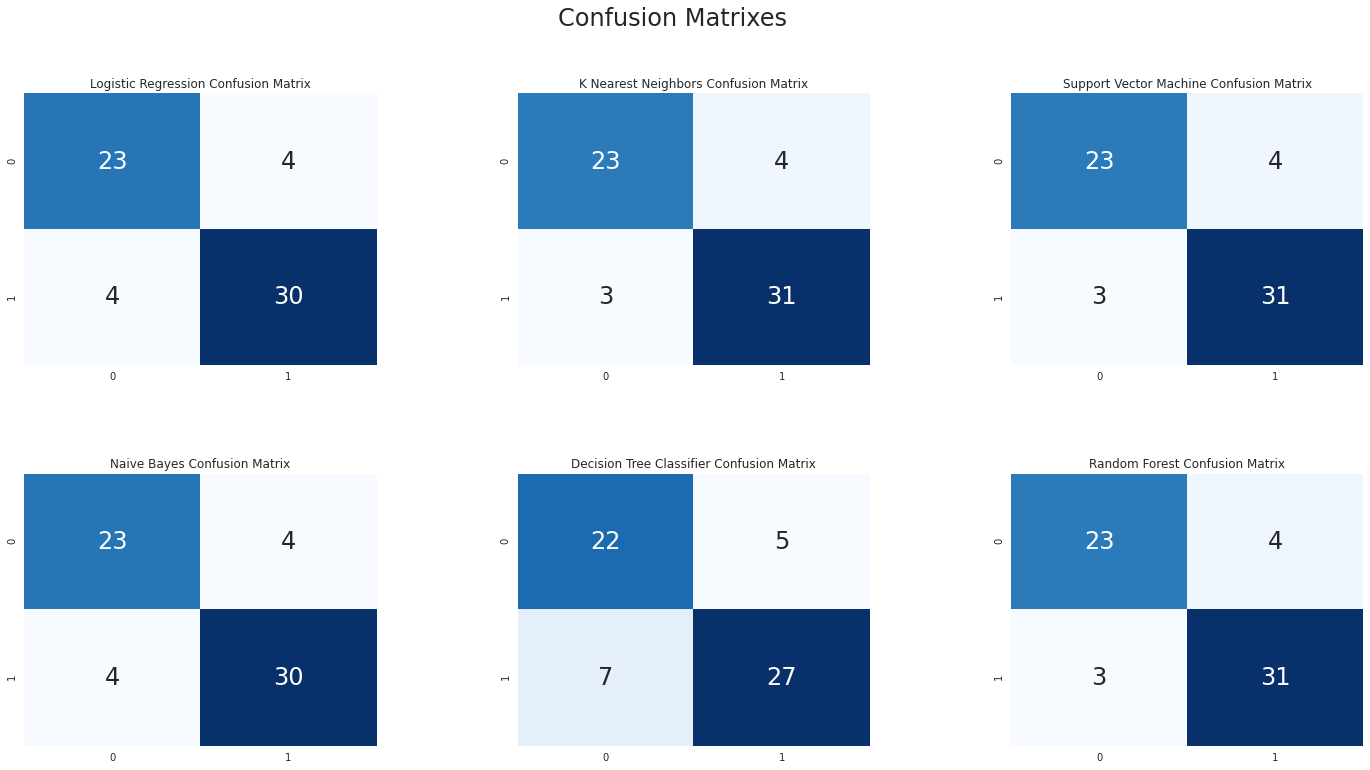

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

**I am new with data science. Please comment me your feedbacks to help me improve myself. Thanks for your time.**